In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [ ]:
file_dir = Path(r"C:\Users\user\Desktop\div\data\files")
cars_csv_path = file_dir / "car-sales-extended-missing-data.csv"
housing_csv_path = file_dir / "housing.csv"

In [10]:
df = pd.read_csv(housing_csv_path)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
df_num = df.select_dtypes(include="number").copy()
df_cat = df.select_dtypes(include="object").copy()

C:\Users\user\AppData\Local\Temp\ipykernel_10108\2736011820.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  df_cat = df.select_dtypes(include="object").copy()


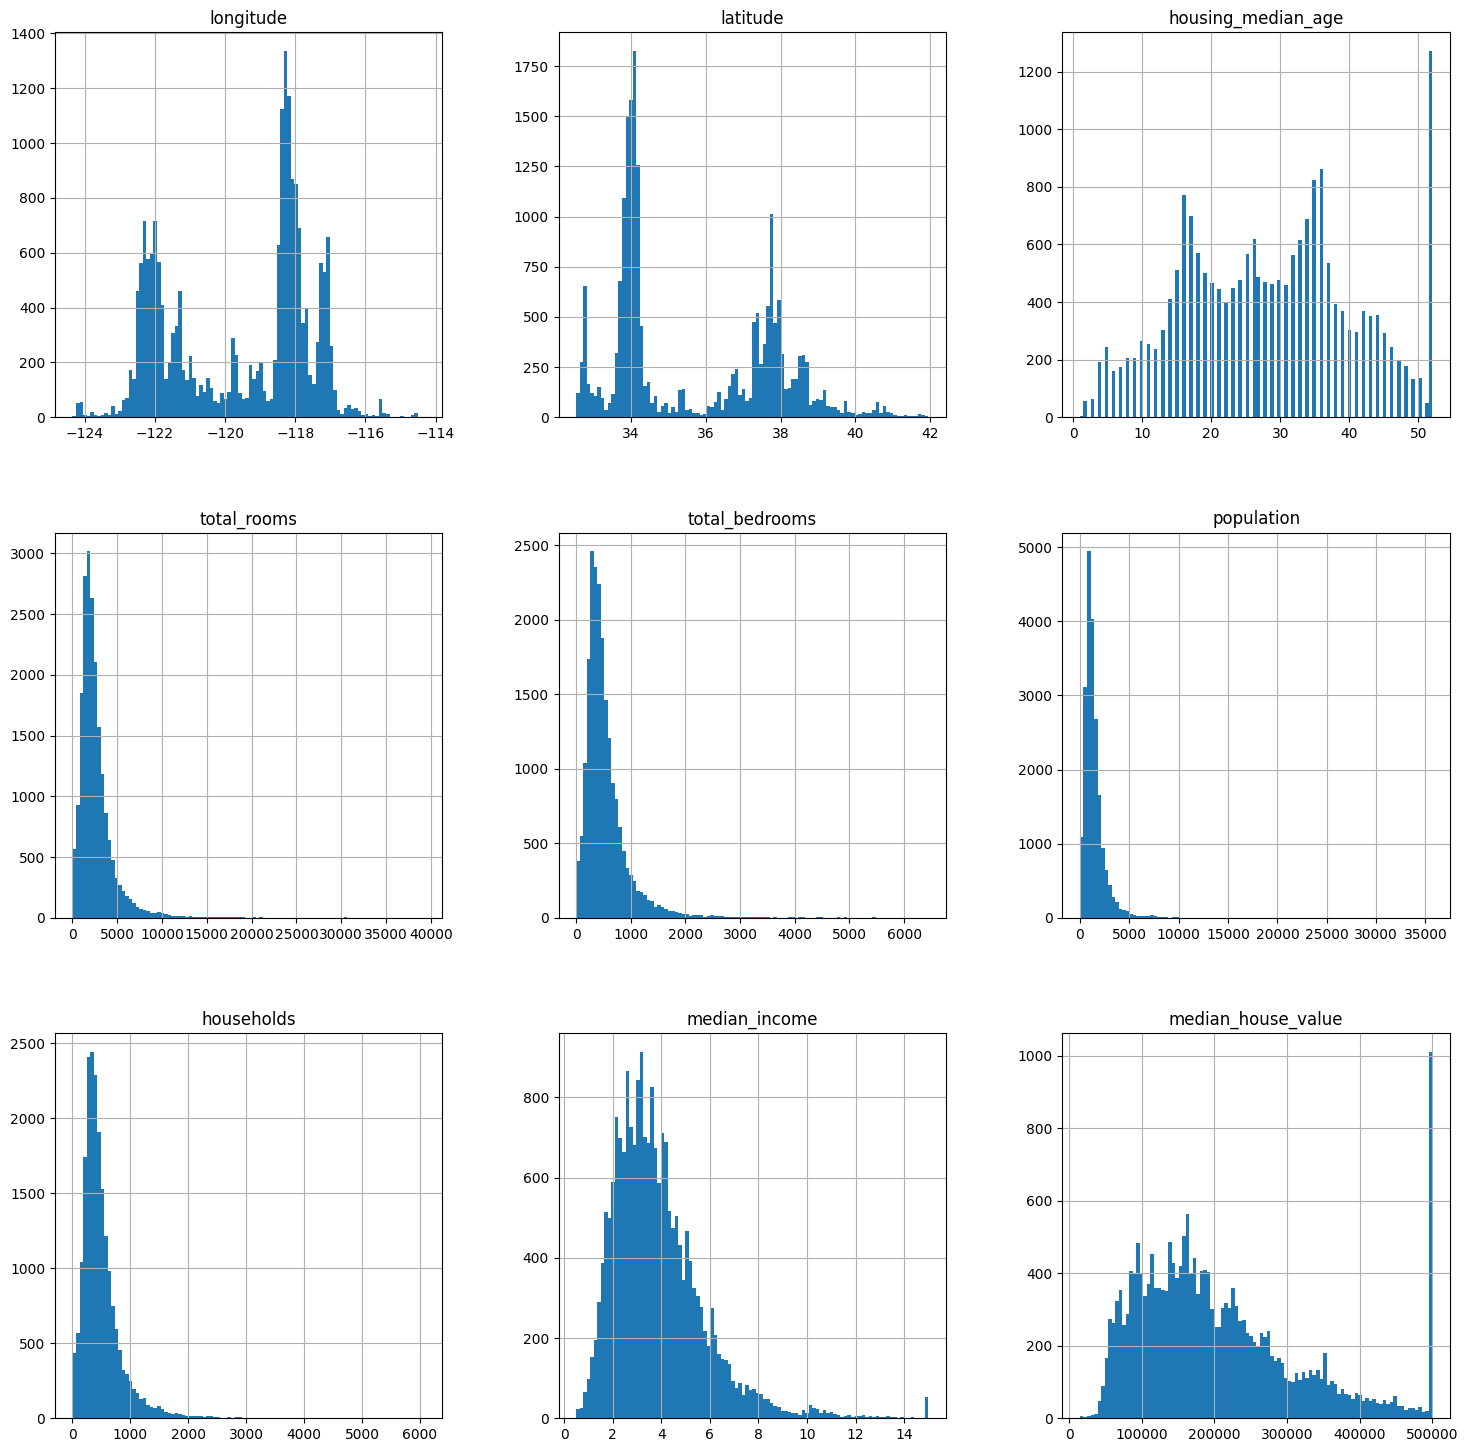

In [12]:
import matplotlib.pyplot as plt

df_num = df.select_dtypes('number')
df_num.hist(figsize=(18,18), bins=100)
plt.show()

In [22]:
yashlar = np.array([23,19,18,24,30])
m = yashlar.mean()
s = yashlar.std()

(yashlar - 18) / (30 - 18)

array([0.41666667, 0.08333333, 0.        , 0.5       , 1.        ])

C:\Users\user\AppData\Local\Temp\ipykernel_10108\398686588.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


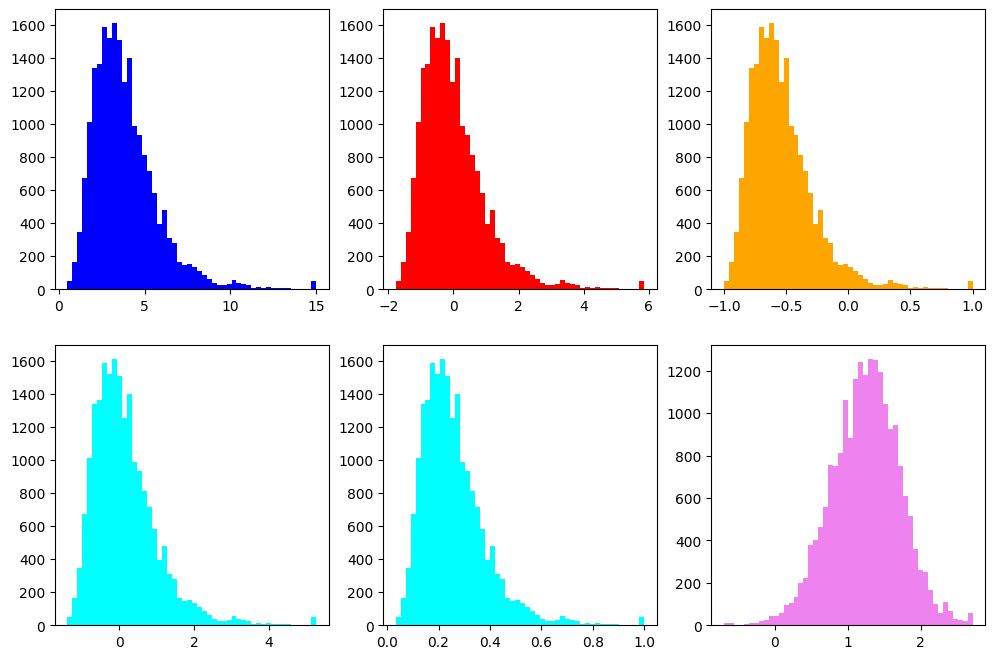

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, PowerTransformer

ss = StandardScaler()
output_ss = ss.fit_transform(df[['median_income']])

mm = MinMaxScaler(feature_range=(-1,1))
output_mm = mm.fit_transform(df[['median_income']])

rs = RobustScaler()
output_rs = rs.fit_transform(df[['median_income']])

ma = MaxAbsScaler()
output_ma = ma.fit_transform(df[['median_income']])

l = np.log(df[['median_income']]) # sag quyruq
# np.exp(df[['median_income']]) #  sol quyruq
nt = PowerTransformer('box-cox') #  sol quyruq, positive
nt = PowerTransformer('yeo-johnson') #  sol quyruq, positive or negative
output = nt.fit_transform(df[['median_income']]) # 

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12,8))
axs[0,0].hist(df['median_income'], bins=50, color='blue')
axs[0,1].hist(output_ss, bins=50, color='red')
axs[0,2].hist(output_mm, bins=50, color='orange')
axs[1,0].hist(output_rs, bins=50, color='cyan')
axs[1,1].hist(output_ma, bins=50, color='cyan')
axs[1,2].hist(l, bins=50, color='violet')
fig.show()

In [79]:
yashlar = np.array([19,21,18,17,33])
m = np.mean(yashlar)
s = np.std(yashlar)
np.std((yashlar - m) / s)

np.float64(0.9999999999999998)

In [83]:
(yashlar - 17)/16

array([0.125 , 0.25  , 0.0625, 0.    , 1.    ])

In [36]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

num_pipeline = Pipeline(steps=[
    ('imputing', SimpleImputer(strategy='median')),	
    ('scaling', StandardScaler())
])
cat_pipeline = Pipeline(steps=[
    ('imputing', SimpleImputer(strategy='most_frequent')),	
    ('encoding', OrdinalEncoder())
])

df_num = df.select_dtypes(include="number").copy()
df_cat = df.select_dtypes(include="object").copy()

df_num_tr = num_pipeline.fit_transform(df_num)
df_cat_tr = cat_pipeline.fit_transform(df_cat)

df_num_tr = pd.DataFrame(df_num_tr, columns=num_pipeline.get_feature_names_out())
df_cat_tr = pd.DataFrame(df_cat_tr, columns=cat_pipeline.get_feature_names_out())

C:\Users\user\AppData\Local\Temp\ipykernel_10108\476993355.py:16: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  df_cat = df.select_dtypes(include="object").copy()


In [37]:
pd.concat([
    df_num_tr, 
	df_cat_tr
], axis=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631,3.0
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156,3.0
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693,3.0
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100,3.0
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900,3.0
...,...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.388283,-0.512592,-0.443449,-1.216128,-1.115804,1.0
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.922403,-0.944405,-1.008420,-0.691593,-1.124470,1.0
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.123608,-0.369537,-0.174042,-1.142593,-0.992746,1.0
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.304827,-0.604429,-0.393753,-1.054583,-1.058608,1.0


In [42]:
from sklearn.compose import ColumnTransformer

num_cols= ['longitude',
 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
 'population', 'households', 'median_income', 'median_house_value']
cat_cols = ['ocean_proximity']

num_pipeline = Pipeline(steps=[
    ('imputing', SimpleImputer(strategy='median')),	
    ('scaling', StandardScaler())
])
cat_pipeline = Pipeline(steps=[
    ('imputing', SimpleImputer(strategy='most_frequent')),	
    ('encoding', OrdinalEncoder())
])

processing = ColumnTransformer([
    ("num_tr", num_pipeline, num_cols),
    ("cat_tr", cat_pipeline, cat_cols)
])

processing.fit_transform(df)

array([[-1.32783522,  1.05254828,  0.98214266, ...,  2.34476576,
         2.12963148,  3.        ],
       [-1.32284391,  1.04318455, -0.60701891, ...,  2.33223796,
         1.31415614,  3.        ],
       [-1.33282653,  1.03850269,  1.85618152, ...,  1.7826994 ,
         1.25869341,  3.        ],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -1.14259331,
        -0.99274649,  1.        ],
       [-0.87362627,  1.77823747, -0.84539315, ..., -1.05458292,
        -1.05860847,  1.        ],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.78012947,
        -1.01787803,  1.        ]], shape=(20640, 10))